In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
db = pd.read_csv('../data/data.csv', delimiter="\t")
print(db.head())

      c [mol/l]  av. [au]  std [au]
0  1.527778e-07  0.022679  0.000613
1  1.358025e-07  0.017082  0.001499
2  1.188272e-07  0.019845  0.001585
3  1.018519e-07  0.012935  0.002459
4  8.487654e-08  0.010958  0.000337


In [3]:
l_per_drop = 0.025 / 1000
mole_per_liter = 5.5*10**(-6)
cuvette_length = 1.0  # cm
cuvette_volume = 0.0027  # l
mole_per_drop = 5.321 * 10**(-6)  # mol/liter

In [5]:
def fit_func(x, a, b):
    return a * x + b

In [11]:
popt, pcov = curve_fit(fit_func, db["c [mol/l]"], db["av. [au]"], sigma=db["std [au]"])

a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print(a, b)
print(a_err, b_err)

141743.7437658154 -0.00017076647323617045
11292.048730556007 0.0009957429733414062


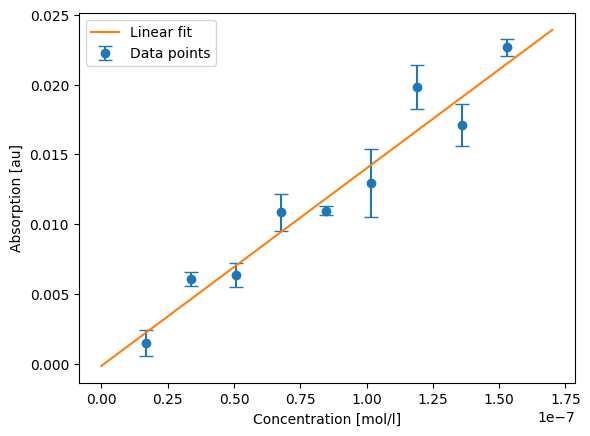

In [15]:
plt.errorbar(db["c [mol/l]"], db["av. [au]"], yerr=db["std [au]"], fmt='o', capsize=5, label="Data points")

xs = np.linspace(0, 1.7*10**(-7), 1000)
plt.plot(xs, fit_func(xs, a, b), label="Linear fit")

plt.xlabel("Concentration [mol/l]")
plt.ylabel("Absorption [au]")

plt.legend()
plt.show()

In [18]:
print(f"a = {round(a)} +/- {round(a_err)}")

a = 141744 +/- 11292
